In [744]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
import warnings
warnings.filterwarnings('ignore')

#### Load Data

In [745]:
df_train = pd.read_csv(r'C:\Users\LENOVO\python\datasets\customerclassi\train.csv')
df_test=pd.read_csv(r'C:\Users\LENOVO\python\datasets\customerclassi\test.csv')

In [746]:
df=pd.concat([df_train,df_test],ignore_index=True)
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


#### Understand Data 

In [747]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [748]:
df.isnull().sum().sort_values(ascending=False)

Work_Experience    1098
Family_Size         448
Ever_Married        190
Profession          162
Var_1               108
Graduated           102
ID                    0
Gender                0
Age                   0
Spending_Score        0
Segmentation          0
dtype: int64

In [749]:
df.drop(columns='ID',inplace=True)
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
10690,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
10691,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
10692,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
10693,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [750]:
df.describe()

,Age,Work_Experience,Family_Size
count,10695.000000,9597.000000,10247.000000
mean,43.511828,2.619777,2.844052
std,16.774158,3.390790,1.536427
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [751]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

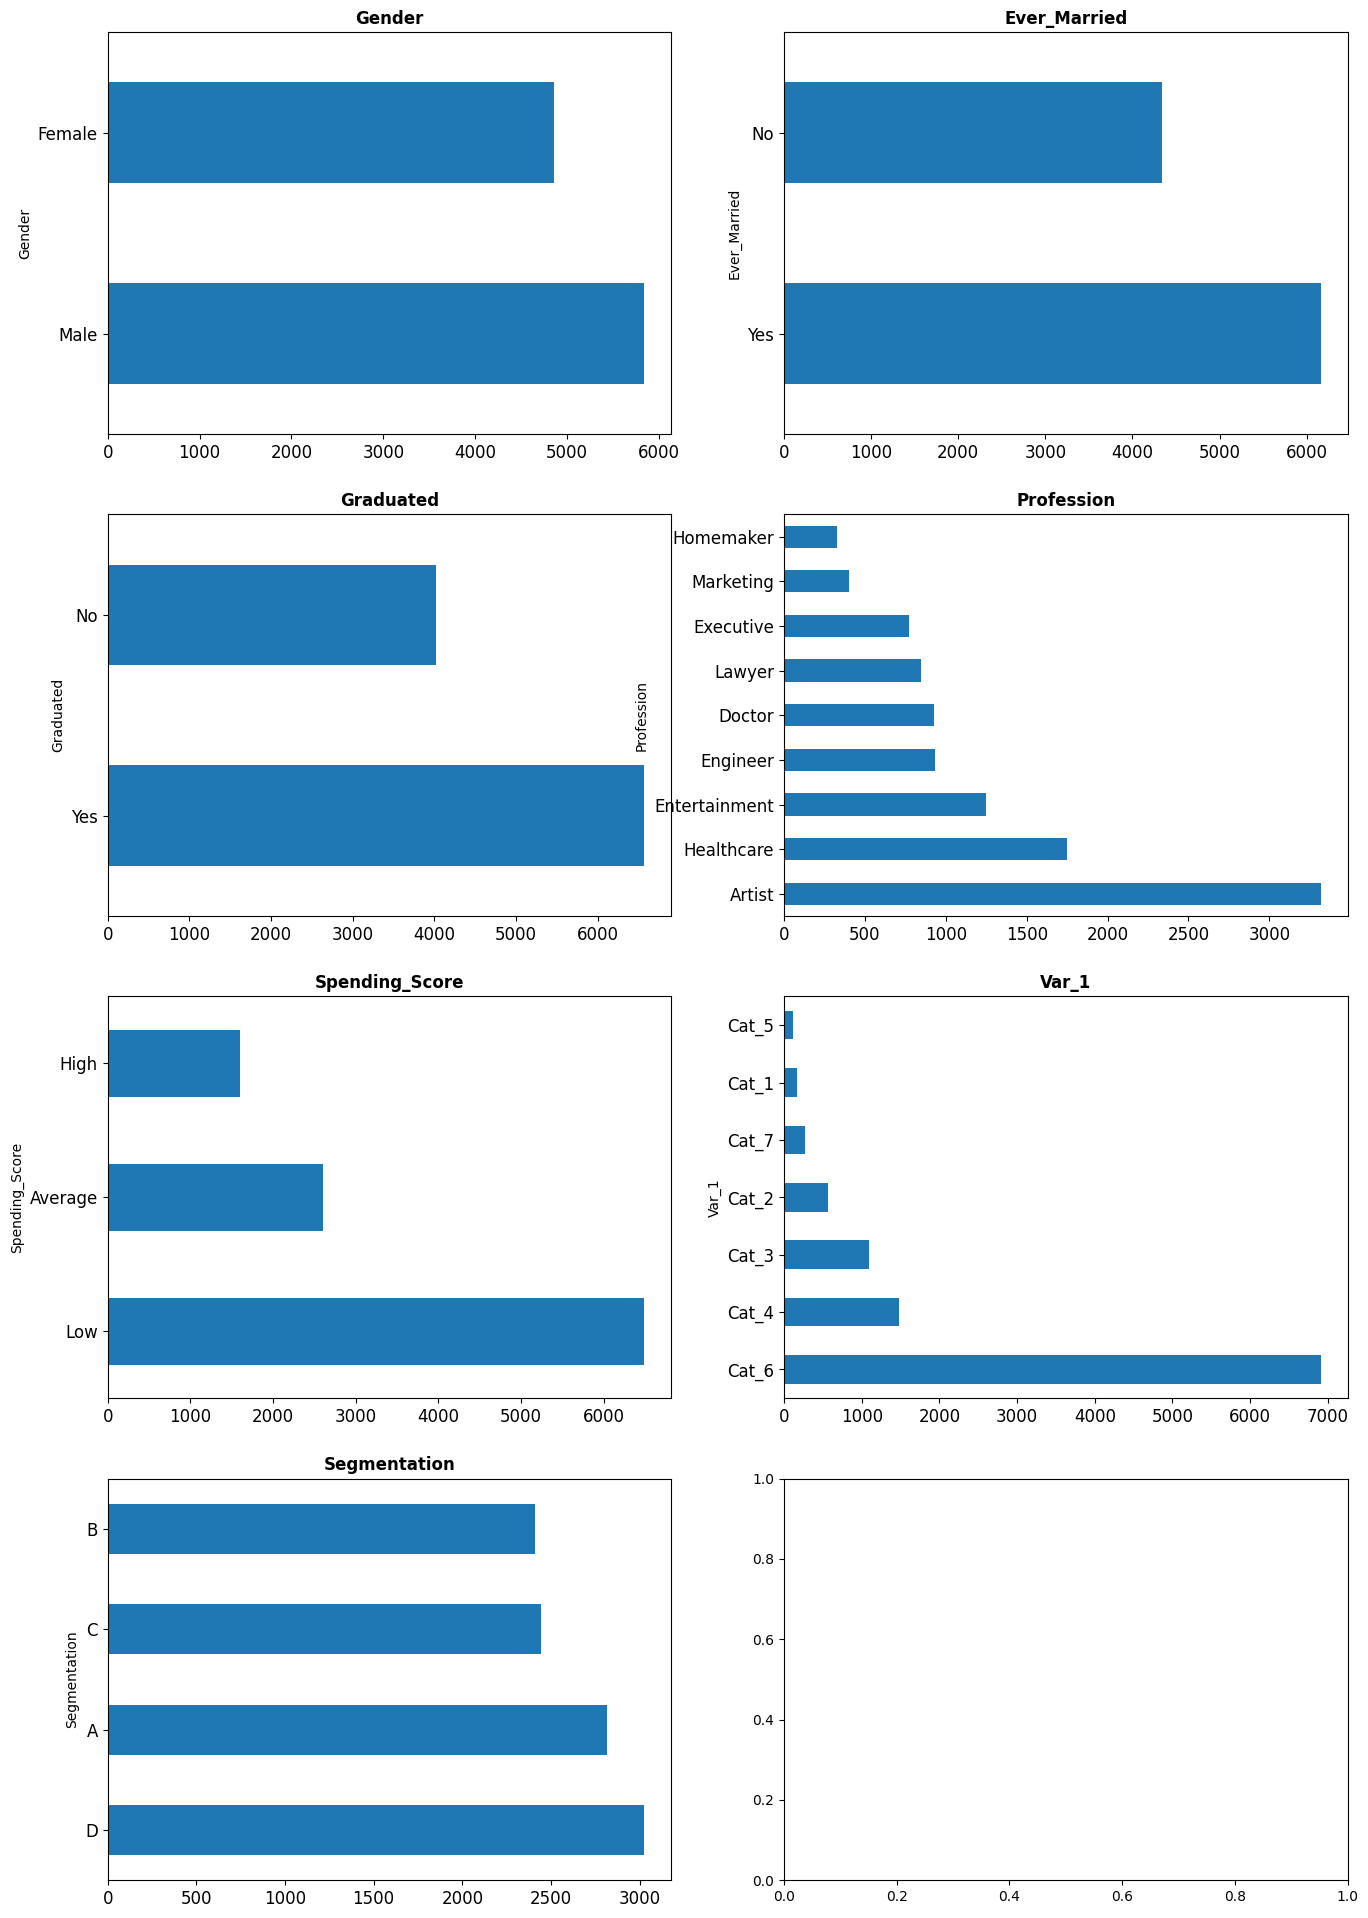

In [752]:
graficos_eda_categoricos(df.select_dtypes('O'))

### Data cleaning

#### Ever Married

In [753]:
df['Ever_Married'].value_counts(normalize=True)

Ever_Married
Yes    0.586673
No     0.413327
Name: proportion, dtype: float64

In [754]:
df[df['Ever_Married'].isna()].groupby('Var_1')['Segmentation'].value_counts()

Var_1  Segmentation
Cat_1  A                2
       B                1
       D                1
Cat_2  C                6
       B                4
       D                4
       A                2
Cat_3  D               16
       A               13
       B                6
       C                5
Cat_4  A               13
       D               12
       B                8
       C                6
Cat_5  D                1
       A                1
Cat_6  D               28
       A               26
       B               17
       C               12
Cat_7  D                2
       A                1
       B                1
Name: count, dtype: int64

In [755]:
df[df['Ever_Married']=='Yes'].groupby('Gender')['Segmentation'].value_counts()
#Seleccionamos el dataset con perosnas casadas agrupadas por genero y vemos donde estan segmemntadas
#NOtamos que predominan segmentos C y B en ambos

Gender  Segmentation
Female  C                821
        B                702
        A                630
        D                338
Male    C               1062
        B               1003
        A                981
        D                626
Name: count, dtype: int64

In [756]:
df[df['Ever_Married']=='No'].groupby('Gender')['Segmentation'].value_counts()
# the same dataset but the difference in this dataset predomina D y A

Gender  Segmentation
Female  D                933
        A                640
        B                377
        C                307
Male    D               1066
        A                508
        B                288
        C                223
Name: count, dtype: int64

#### Rellenamos con No en esta variable

In [757]:
df['Ever_Married'].fillna('No',inplace=True)

In [758]:
df['Ever_Married'].isna().sum()

0

### Profesion

In [759]:
df['Profession'].value_counts(normalize=True)

Profession
Artist           0.315010
Healthcare       0.166144
Entertainment    0.118675
Engineer         0.088769
Doctor           0.088294
Lawyer           0.080129
Executive        0.073578
Marketing        0.038261
Homemaker        0.031140
Name: proportion, dtype: float64

In [760]:
df[df['Profession'].isna()].groupby('Var_1')['Segmentation'].value_counts(normalize=True)

Var_1  Segmentation
Cat_1  D               1.000000
Cat_2  B               0.666667
       A               0.333333
Cat_3  A               0.384615
       D               0.269231
       C               0.192308
       B               0.153846
Cat_4  D               0.536585
       A               0.195122
       B               0.170732
       C               0.097561
Cat_5  D               1.000000
Cat_6  D               0.302632
       A               0.276316
       B               0.223684
       C               0.197368
Cat_7  A               0.500000
       C               0.300000
       D               0.200000
Name: proportion, dtype: float64

In [761]:
df[df['Profession']=='Healthcare'].groupby('Var_1')['Segmentation'].value_counts(normalize=True)

Var_1  Segmentation
Cat_1  D               0.687500
       C               0.156250
       A               0.156250
Cat_2  D               0.682635
       A               0.131737
       B               0.101796
       C               0.083832
Cat_3  D               0.708333
       A               0.166667
       C               0.083333
       B               0.041667
Cat_4  D               0.673759
       B               0.141844
       A               0.106383
       C               0.078014
Cat_5  D               0.516129
       A               0.225806
       B               0.129032
       C               0.129032
Cat_6  D               0.675000
       A               0.131250
       C               0.111458
       B               0.082292
Cat_7  D               0.650794
       B               0.142857
       A               0.126984
       C               0.079365
Name: proportion, dtype: float64

In [762]:
df[df['Profession']=='Engineer'].groupby('Var_1')['Segmentation'].value_counts(normalize=True)

Var_1  Segmentation
Cat_1  B               0.363636
       A               0.272727
       D               0.181818
       C               0.181818
Cat_2  B               0.448276
       A               0.241379
       D               0.206897
       C               0.103448
Cat_3  A               0.300813
       B               0.292683
       D               0.268293
       C               0.138211
Cat_4  A               0.439716
       B               0.234043
       D               0.219858
       C               0.106383
Cat_5  A               0.600000
       B               0.200000
       C               0.100000
       D               0.100000
Cat_6  A               0.331858
       D               0.272124
       B               0.254425
       C               0.141593
Cat_7  A               0.454545
       D               0.227273
       B               0.181818
       C               0.136364
Name: proportion, dtype: float64

In [763]:
df[df['Profession']=='Artist'].groupby('Var_1')['Segmentation'].value_counts(normalize=True)

Var_1  Segmentation
Cat_1  C               0.340426
       B               0.319149
       A               0.234043
       D               0.106383
Cat_2  C               0.413174
       B               0.269461
       A               0.239521
       D               0.077844
Cat_3  C               0.329457
       B               0.321705
       A               0.282946
       D               0.065891
Cat_4  A               0.313653
       B               0.291513
       C               0.217712
       D               0.177122
Cat_5  C               0.333333
       D               0.277778
       B               0.194444
       A               0.194444
Cat_6  C               0.395041
       B               0.279339
       A               0.237190
       D               0.088430
Cat_7  C               0.373494
       A               0.301205
       B               0.228916
       D               0.096386
Name: proportion, dtype: float64

In [764]:
### Rellanamos con 'HealthCare'

In [765]:
df['Profession'].fillna('Healthcare',inplace=True)

In [766]:
df['Profession'].isna().sum()

0

### Var_1

In [767]:
df['Var_1'].value_counts(normalize=True)*100

Var_1
Cat_6    65.268726
Cat_4    13.932181
Cat_3    10.286200
Cat_2     5.317843
Cat_7     2.540852
Cat_1     1.577406
Cat_5     1.076792
Name: proportion, dtype: float64

In [768]:
df[df['Var_1'].isna()].groupby('Spending_Score')['Segmentation'].value_counts(normalize=True)*100

Spending_Score  Segmentation
Average         C               36.000000
                A               28.000000
                B               20.000000
                D               16.000000
High            B               40.000000
                A               26.666667
                C               26.666667
                D                6.666667
Low             D               38.235294
                A               29.411765
                C               20.588235
                B               11.764706
Name: proportion, dtype: float64

In [769]:
df[df['Var_1'].isna()].groupby('Gender')['Segmentation'].value_counts(normalize=True)*100

Gender  Segmentation
Female  D               28.813559
        A               23.728814
        B               23.728814
        C               23.728814
Male    A               34.693878
        D               28.571429
        C               26.530612
        B               10.204082
Name: proportion, dtype: float64

In [770]:
df[df['Var_1']=='Cat_6'].groupby('Gender')['Segmentation'].value_counts(normalize=True)*100

Gender  Segmentation
Female  C               27.041322
        A               25.388430
        D               24.958678
        B               22.611570
Male    D               25.997426
        C               25.508366
        A               25.328185
        B               23.166023
Name: proportion, dtype: float64

In [771]:
df[df['Var_1']=='Cat_6'].groupby('Spending_Score')['Segmentation'].value_counts(normalize=True)*100

Spending_Score  Segmentation
Average         C               46.937538
                B               27.835052
                A               17.525773
                D                7.701637
High            C               35.351882
                B               28.968903
                A               23.322422
                D               12.356792
Low             D               36.816044
                A               29.165635
                B               19.088883
                C               14.929438
Name: proportion, dtype: float64

In [772]:
df[df['Var_1']=='Cat_4'].groupby('Gender')['Segmentation'].value_counts(normalize=True)*100

Gender  Segmentation
Female  A               34.054834
        D               31.746032
        B               21.645022
        C               12.554113
Male    D               39.386189
        A               27.365729
        B               21.739130
        C               11.508951
Name: proportion, dtype: float64

In [773]:
df[df['Var_1']=='Cat_4'].groupby('Spending_Score')['Segmentation'].value_counts(normalize=True)*100

Spending_Score  Segmentation
Average         B               31.540342
                A               31.295844
                D               20.293399
                C               16.870416
High            A               30.967742
                D               29.677419
                B               27.096774
                C               12.258065
Low             D               43.798024
                A               30.076839
                B               16.355653
                C                9.769484
Name: proportion, dtype: float64

In [774]:
df[df['Var_1']=='Cat_3'].groupby('Gender')['Segmentation'].value_counts(normalize=True)*100

Gender  Segmentation
Female  D               29.377432
        A               28.988327
        B               22.373541
        C               19.260700
Male    D               32.347826
        A               29.043478
        B               21.565217
        C               17.043478
Name: proportion, dtype: float64

In [775]:
df[df['Var_1']=='Cat_3'].groupby('Spending_Score')['Segmentation'].value_counts(normalize=True)*100

Spending_Score  Segmentation
Average         C               33.720930
                B               27.906977
                A               27.131783
                D               11.240310
High            A               30.851064
                B               24.468085
                C               22.340426
                D               22.340426
Low             D               38.941655
                A               29.443691
                B               19.538670
                C               12.075984
Name: proportion, dtype: float64

#### Rellanmos con Cat_4

In [776]:
df['Var_1'].fillna('Cat_4',inplace=True)

### Graduated

In [777]:
df['Graduated'].value_counts(normalize=True)*100

Graduated
Yes    62.02209
No     37.97791
Name: proportion, dtype: float64

In [778]:
df[df['Graduated'].isna()].groupby('Spending_Score')['Segmentation'].value_counts(normalize=True)*100

Spending_Score  Segmentation
Average         B               37.037037
                C               29.629630
                A               18.518519
                D               14.814815
High            A               40.000000
                B               20.000000
                C               20.000000
                D               20.000000
Low             D               33.333333
                A               31.666667
                B               18.333333
                C               16.666667
Name: proportion, dtype: float64

In [779]:
df[df['Graduated'].isna()].groupby('Gender')['Segmentation'].value_counts(normalize=True)*100

Gender  Segmentation
Female  D               31.707317
        A               29.268293
        C               24.390244
        B               14.634146
Male    A               29.508197
        B               29.508197
        D               22.950820
        C               18.032787
Name: proportion, dtype: float64

In [780]:
df[df['Graduated'].isna()].groupby('Ever_Married')['Segmentation'].value_counts(normalize=True)*100

Ever_Married  Segmentation
No            D               40.909091
              A               27.272727
              B               20.454545
              C               11.363636
Yes           A               31.034483
              C               27.586207
              B               25.862069
              D               15.517241
Name: proportion, dtype: float64

In [781]:
df[df['Graduated']=='Yes'].groupby('Spending_Score')['Segmentation'].value_counts(normalize=True)*100

Spending_Score  Segmentation
Average         C               47.581493
                B               27.707676
                A               17.139853
                D                7.570978
High            C               40.215264
                B               29.256360
                A               20.645793
                D                9.882583
Low             A               32.857926
                D               26.549643
                B               23.642348
                C               16.950082
Name: proportion, dtype: float64

In [782]:
df[df['Graduated']=='No'].groupby('Spending_Score')['Segmentation'].value_counts(normalize=True)*100

Spending_Score  Segmentation
Average         A               30.746269
                B               30.149254
                D               19.701493
                C               19.402985
High            A               31.150442
                B               29.203540
                D               23.716814
                C               15.929204
Low             D               54.555237
                A               24.067432
                B               11.800574
                C                9.576758
Name: proportion, dtype: float64

In [783]:
df[df['Graduated']=='Yes'].groupby('Gender')['Segmentation'].value_counts(normalize=True)*100

Gender  Segmentation
Female  C               29.770003
        B               25.882734
        A               25.850340
        D               18.496923
Male    C               29.141545
        A               26.902096
        B               25.523974
        D               18.432386
Name: proportion, dtype: float64

In [784]:
df[df['Graduated']=='No'].groupby('Gender')['Segmentation'].value_counts(normalize=True)*100

Gender  Segmentation
Female  D               42.004635
        A               28.505214
        B               16.975666
        C               12.514484
Male    D               46.234219
        A               24.423161
        B               17.544623
        C               11.797997
Name: proportion, dtype: float64

In [785]:
df[df['Graduated']=='Yes'].groupby('Ever_Married')['Segmentation'].value_counts(normalize=True)*100

Ever_Married  Segmentation
No            A               33.611599
              D               30.492091
              B               21.001757
              C               14.894552
Yes           C               37.144853
              B               28.178854
              A               22.589660
              D               12.086633
Name: proportion, dtype: float64

In [786]:
df[df['Graduated']=='No'].groupby('Ever_Married')['Segmentation'].value_counts(normalize=True)*100

Ever_Married  Segmentation
No            D               61.075949
              A               19.439421
              B                9.764919
              C                9.719711
Yes           A               34.400883
              B               26.504694
              D               24.075097
              C               15.019326
Name: proportion, dtype: float64

In [787]:
### Rellenamos con 'No'

In [788]:
df['Graduated'].fillna('No',inplace=True)

In [789]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10695 non-null  object 
 1   Ever_Married     10695 non-null  object 
 2   Age              10695 non-null  int64  
 3   Graduated        10695 non-null  object 
 4   Profession       10695 non-null  object 
 5   Work_Experience  9597 non-null   float64
 6   Spending_Score   10695 non-null  object 
 7   Family_Size      10247 non-null  float64
 8   Var_1            10695 non-null  object 
 9   Segmentation     10695 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 835.7+ KB


In [790]:
df.isnull().sum().sort_values(ascending=False)

Work_Experience    1098
Family_Size         448
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Spending_Score        0
Var_1                 0
Segmentation          0
dtype: int64

### Variables numericas

In [791]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [792]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Age,10695.0,43.511828,41.0,16.774158,18.0,30.0,41.0,53.0,89.0
Work_Experience,9597.0,2.619777,1.0,3.390790,0.0,0.0,1.0,4.0,14.0
Family_Size,10247.0,2.844052,3.0,1.536427,1.0,2.0,3.0,4.0,9.0


#### Work_Experience

In [793]:
df[df['Work_Experience'].isna()]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
13,Male,Yes,70,No,Lawyer,NaN,Low,1.0,Cat_6,A
39,Male,Yes,56,Yes,Artist,NaN,Average,2.0,Cat_6,C
45,Female,Yes,79,No,Lawyer,NaN,High,2.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
10615,Female,Yes,35,Yes,Artist,NaN,Average,4.0,Cat_6,D
10640,Female,No,23,No,Healthcare,NaN,Low,2.0,Cat_6,D
10656,Female,No,29,No,Artist,NaN,Low,4.0,Cat_4,D
10661,Female,Yes,51,Yes,Artist,NaN,High,4.0,Cat_6,A


In [794]:
## Rellenamos con la median()

In [795]:
df['Work_Experience'].fillna(df['Work_Experience'].median(),inplace=True)

### Family_Size

In [796]:
len(df[df['Family_Size'].isna()])/len(df)*100


4.188873305282843

In [797]:
df=df.dropna()

In [798]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10247 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10247 non-null  object 
 1   Ever_Married     10247 non-null  object 
 2   Age              10247 non-null  int64  
 3   Graduated        10247 non-null  object 
 4   Profession       10247 non-null  object 
 5   Work_Experience  10247 non-null  float64
 6   Spending_Score   10247 non-null  object 
 7   Family_Size      10247 non-null  float64
 8   Var_1            10247 non-null  object 
 9   Segmentation     10247 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 880.6+ KB


In [799]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


In [800]:
### Casos particulares
#iltramos el data set con 14 años de experiencia y edad < 29 años

In [801]:
df=df.drop(df.loc[(df['Work_Experience']==14) & (df['Age']<=29)].index)

In [802]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
10690,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
10691,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
10692,Female,No,53,Yes,Entertainment,1.0,Low,2.0,Cat_6,C
10693,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


### MODELO DE MACHINE LEARNING

df_ml=df.copy()
df_ml.info()

In [827]:
df_ml=df.copy() 
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10228 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10228 non-null  object 
 1   Ever_Married     10228 non-null  object 
 2   Age              10228 non-null  int64  
 3   Graduated        10228 non-null  object 
 4   Profession       10228 non-null  object 
 5   Work_Experience  10228 non-null  float64
 6   Spending_Score   10228 non-null  object 
 7   Family_Size      10228 non-null  float64
 8   Var_1            10228 non-null  object 
 9   Segmentation     10228 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 879.0+ KB


### PREPARACIÓN DE LOS DATOS PARA LA MODELIZACIÓN

In [829]:
x = df_ml.drop(columns='Segmentation')
y = df_ml['Segmentation']

In [830]:
x


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...
10690,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
10691,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
10692,Female,No,53,Yes,Entertainment,1.0,Low,2.0,Cat_6
10693,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [865]:
#### Transformar todas las variables categóricas a númericas

In [831]:
from sklearn.preprocessing import OneHotEncoder

#Categóricas
cat = x.select_dtypes('O')

#Instanciamos
ohe = OneHotEncoder(sparse = False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

In [832]:
cat_ohe.columns

Index(['Gender_Female', 'Gender_Male', 'Ever_Married_No', 'Ever_Married_Yes',
       'Graduated_No', 'Graduated_Yes', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_Average',
       'Spending_Score_High', 'Spending_Score_Low', 'Var_1_Cat_1',
       'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5',
       'Var_1_Cat_6', 'Var_1_Cat_7'],
      dtype='object')

In [834]:
num = x.select_dtypes('number').reset_index(drop = True)

In [835]:
x_ = pd.concat([cat_ohe,num], axis = 1)


In [837]:
x_.info()
y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10228 entries, 0 to 10227
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender_Female             10228 non-null  float64
 1   Gender_Male               10228 non-null  float64
 2   Ever_Married_No           10228 non-null  float64
 3   Ever_Married_Yes          10228 non-null  float64
 4   Graduated_No              10228 non-null  float64
 5   Graduated_Yes             10228 non-null  float64
 6   Profession_Artist         10228 non-null  float64
 7   Profession_Doctor         10228 non-null  float64
 8   Profession_Engineer       10228 non-null  float64
 9   Profession_Entertainment  10228 non-null  float64
 10  Profession_Executive      10228 non-null  float64
 11  Profession_Healthcare     10228 non-null  float64
 12  Profession_Homemaker      10228 non-null  float64
 13  Profession_Lawyer         10228 non-null  float64
 14  Profes

0        D
1        A
2        B
3        B
4        A
        ..
10690    B
10691    A
10692    C
10693    C
10694    A
Name: Segmentation, Length: 10228, dtype: object

In [846]:
x_

,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Age,Work_Experience,Family_Size
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22,1.0,4.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,38,1.0,3.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,67,1.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,67,0.0,2.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,40,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10223,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29,9.0,4.0
10224,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35,1.0,1.0
10225,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,53,1.0,2.0
10226,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,47,1.0,5.0


In [866]:
### DISEÑO DE LA MODELIZACIÓN

In [845]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(x_)

X

array([[-0.9058569 ,  0.9058569 ,  1.18385079, ..., -1.29119242,
        -0.44546107,  0.75375811],
       [ 1.10392713, -1.10392713, -0.84470104, ..., -0.3333063 ,
        -0.44546107,  0.10190743],
       [ 1.10392713, -1.10392713, -0.84470104, ...,  1.40286229,
        -0.44546107, -1.20179391],
       ...,
       [ 1.10392713, -1.10392713,  1.18385079, ...,  0.56471194,
        -0.44546107, -0.54994324],
       [-0.9058569 ,  0.9058569 , -0.84470104, ...,  0.20550464,
        -0.44546107,  1.40560878],
       [ 1.10392713, -1.10392713,  1.18385079, ..., -0.03396689,
         2.04374242,  0.10190743]])

In [857]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

print(X_train.shape, X_test.shape)

(8182, 28) (2046, 28)


In [867]:
###ENTRENAMIENTO DEL MODELO SOBRE TRAIN

In [848]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rc = RandomForestClassifier()



param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [849]:
rf_random = RandomizedSearchCV(estimator = rc, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 25,
 'max_leaf_nodes': 9,
 'max_features': 'log2',
 'max_depth': 6}

In [850]:
rc1 = RandomForestClassifier(n_estimators = 25, random_state = 1, 
                             max_leaf_nodes = 9,max_features= 'log2',max_depth = 6 )
rc1.fit(X_train, y_train)   

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=25, random_state=1)

In [851]:
from sklearn.metrics import classification_report
y_pred_grid = rc1.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           A       0.46      0.38      0.42       995
           B       0.07      0.39      0.12       119
           C       0.60      0.44      0.51       980
           D       0.64      0.55      0.59       975

    accuracy                           0.45      3069
   macro avg       0.44      0.44      0.41      3069
weighted avg       0.55      0.45      0.49      3069



In [852]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_pred_grid, y_test,average='micro',pos_label='positive'))
print(recall_score(y_pred_grid, y_test,average='micro',pos_label='positive'))

0.454871293580971
0.454871293580971


In [853]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
  
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.390 total time=   3.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.413 total time=   3.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.362 total time=   3.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.389 total time=   3.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.386 total time=   3.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.448 total time=   2.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.459 total time=   3.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.412 total time=   2.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.439 total time=   2.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.456 total time=   3.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.455 total time=   2.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [854]:
grid.best_params_


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [869]:


svc = SVC(kernel='rbf',C= 1, gamma = 0.1)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))


print(precision_score(y_pred, y_test,average='micro'))
print(recall_score(y_pred, y_test,average='micro'))

              precision    recall  f1-score   support

           A       0.37      0.41      0.39       528
           B       0.37      0.28      0.32       462
           C       0.48      0.48      0.48       505
           D       0.54      0.58      0.56       551

    accuracy                           0.44      2046
   macro avg       0.44      0.44      0.44      2046
weighted avg       0.44      0.44      0.44      2046

0.4447702834799609
0.4447702834799609
